# EDA - Fundamentos de Análisis de Datos

## Añadir heatmap de datos faltantes!!!!!!!!
https://github.com/ResidentMario/missingno

## Librerias


In [ ]:
from google.colab import files
import pandas as pd
import pandas_profiling
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

## Datos


In [ ]:
uploaded = files.upload()

Saving simple_hotel_bookings.csv to simple_hotel_bookings.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['simple_hotel_bookings.csv']))
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,177,2017,August,33,17,2,5,3,0.0,0,BB,ROU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,164.44,0,0,Canceled,2017-02-24
1,Resort Hotel,0,8,2017,February,7,17,1,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,D,0,No Deposit,250.0,NaN,0,Transient,67.00,1,0,Check-Out,2017-02-20
2,City Hotel,1,181,2017,June,23,8,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,58.0,NaN,0,Transient,100.00,0,0,Canceled,2017-01-24
3,City Hotel,0,45,2016,November,48,25,1,2,2,0.0,0,BB,BRA,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,90.00,0,0,Check-Out,2016-11-28
4,City Hotel,1,64,2017,July,30,23,2,1,2,0.0,0,BB,ARG,Direct,Direct,0,0,0,E,E,0,No Deposit,14.0,NaN,0,Transient,174.33,0,1,Canceled,2017-05-22


Vamos a observar un resumen sobre las variables numéricas:

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8654.000000,559.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.375100,105.393800,2016.166900,27.267700,15.864100,0.927100,2.516500,1.869600,0.108000,0.008500,0.031900,0.087500,0.127400,0.218700,89.090941,188.869410,2.201200,102.150192,0.06440,0.579300
std,0.484173,108.267682,0.705616,13.671588,8.725941,0.990396,1.882892,0.572912,0.405157,0.093961,0.175743,0.852242,1.269067,0.684045,112.721390,138.001931,17.405235,48.778734,0.24629,0.797731
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,49.000000,0.000000,68.530000,0.00000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.000000,94.000000,0.00000,0.000000
75%,1.000000,164.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,280.000000,0.000000,126.000000,0.00000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,10.000000,25.000000,27.000000,3.000000,2.000000,1.000000,26.000000,60.000000,16.000000,531.000000,530.000000,391.000000,388.000000,2.00000,5.000000


Mostramos la matriz de correlación entre las variables

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.300322,0.024577,-0.002117,-0.009072,-0.006372,0.019155,0.068910,0.013710,-0.030521,-0.079520,0.105622,-0.070294,-0.126024,-0.083498,0.022658,0.057597,0.049155,-0.202595,-0.238465
lead_time,0.300322,1.000000,0.039142,0.125362,-0.002752,0.093504,0.172592,0.123425,-0.039498,-0.015174,-0.116012,0.081086,-0.084707,0.003191,-0.074082,0.168360,0.165606,-0.064772,-0.119927,-0.103249
arrival_date_year,0.024577,0.039142,1.000000,-0.539884,-0.001400,0.028002,0.042828,0.028113,0.056933,-0.009332,-0.007453,-0.122741,0.029414,0.035844,0.073102,0.259735,-0.050217,0.217300,-0.011788,0.104497
arrival_date_week_number,-0.002117,0.125362,-0.539884,1.000000,0.064799,0.018045,0.011346,0.029802,-0.002981,0.004690,-0.040559,0.029336,-0.030383,-0.002817,-0.028062,-0.078391,0.011536,0.069965,-0.000309,0.023936
arrival_date_day_of_month,-0.009072,-0.002752,-0.001400,0.064799,1.000000,-0.031836,-0.027325,0.009958,-0.000346,-0.008105,-0.004933,-0.020335,0.011733,0.017864,0.013063,0.037240,0.034493,0.030133,0.005841,-0.003962
stays_in_weekend_nights,-0.006372,0.093504,0.028002,0.018045,-0.031836,1.000000,0.496751,0.090233,0.048036,0.023855,-0.088915,-0.017917,-0.055550,0.043907,0.162056,0.080099,-0.065167,0.062446,-0.017652,0.070293
stays_in_week_nights,0.019155,0.172592,0.042828,0.011346,-0.027325,0.496751,1.000000,0.089143,0.039615,0.040191,-0.097247,-0.018070,-0.053741,0.090570,0.197426,0.199179,-0.003306,0.063893,-0.016310,0.067509
adults,0.068910,0.123425,0.028113,0.029802,0.009958,0.090233,0.089143,1.000000,0.042151,0.013161,-0.147407,-0.005715,-0.127632,-0.033894,-0.044185,0.227391,-0.010477,0.247537,0.010616,0.119568
children,0.013710,-0.039498,0.056933,-0.002981,-0.000346,0.048036,0.039615,0.042151,1.000000,0.046815,-0.038558,-0.027081,-0.025207,0.052975,0.037633,0.002325,-0.033715,0.354569,0.029514,0.100985
babies,-0.030521,-0.015174,-0.009332,0.004690,-0.008105,0.023855,0.040191,0.013161,0.046815,1.000000,-0.010366,-0.008040,-0.009082,0.086219,0.033853,-0.023846,-0.011381,0.044477,0.062776,0.114425


Juntamos las columnas de año, mes y dia para crear un único datetime.
También añadimos una con el mes de forma numérica para usarlas posteriormente.

In [ ]:
data['arrival_datetime'] = pd.to_datetime(data['arrival_date_year'].map(str) + "-" + data['arrival_date_month'].map(str) + "-" + data['arrival_date_day_of_month'].map(str))
data['arrival_month'] = data['arrival_datetime'].map(str).str[5:7]

In [ ]:
data = data.sort_values(by=['arrival_datetime'], ascending=True)
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_datetime,arrival_month
8095,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,101.50,0,0,Check-Out,2015-07-03,2015-07-01,07
5423,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,101.50,0,0,Check-Out,2015-07-03,2015-07-01,07
1182,City Hotel,0,257,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,6.0,NaN,0,Transient,80.00,0,0,Check-Out,2015-07-03,2015-07-01,07
5157,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,101.50,0,0,Check-Out,2015-07-03,2015-07-01,07
5772,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,101.50,0,0,Check-Out,2015-07-03,2015-07-01,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,Resort Hotel,0,2,2017,August,35,31,0,3,2,2.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient-Party,200.00,0,2,Check-Out,2017-09-03,2017-08-31,08
3980,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31,08
94,City Hotel,1,218,2017,August,35,31,2,5,3,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,162.00,0,0,Canceled,2017-01-31,2017-08-31,08
8322,Resort Hotel,0,2,2017,August,35,31,0,3,2,0.0,0,Undefined,PRT,Direct,Direct,0,0,0,A,D,2,No Deposit,250.0,NaN,0,Transient,245.33,0,2,Check-Out,2017-09-03,2017-08-31,08


Agrupamos los datos por la fecha total, y por año y mes para estudiar los cambios a lo largo del tiempo.

In [ ]:
data_groupby_year_month = data.groupby(by=["arrival_date_year", "arrival_date_month"])
data_groupby_date = data.groupby(by=["arrival_datetime"])

### hotel
Primero comenzamos observando la columna de hotel



In [ ]:
data['hotel'].describe()

count          10000
unique             2
top       City Hotel
freq            6564
Name: hotel, dtype: object

Como vemos, solo hay dos tipos distintos de hoteles, y el más repetido es el "City Hotel".



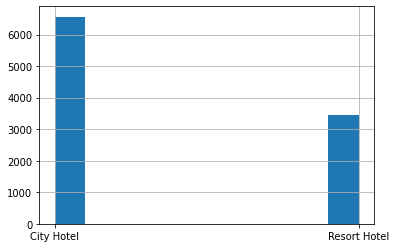

In [ ]:
data['hotel'].hist()

##### Tabla de contingencias

In [ ]:
pd.crosstab(data['hotel'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)


is_canceled,0,1
hotel,,
City Hotel,0.578458,0.421542
Resort Hotel,0.713620,0.286380


Creamos una tabla de contiengencias, y después esa misma tabla de contingencias pero observando los porcentajes, de tal forma que se puede ver que el porcentaje de cancelados es mayor en "City Hotel".


##### Evolución Histórica
Ahora vamos a obtener columnas númericas a partir de la columna "hotel" (**one hot encoder**) para poder agrupar cuantos hoteles se reservan cada mes.


In [ ]:
data_hotel_and_date = data[['arrival_date_year', 'arrival_month', 'hotel']]
data_hotel_and_date = pd.get_dummies(data_hotel_and_date, columns=["hotel"])[['arrival_date_year', 'arrival_month', 'hotel_City Hotel', 'hotel_Resort Hotel']]
data_hotel_and_date = data_hotel_and_date.groupby(by=['arrival_date_year', 'arrival_month']).sum()
data_hotel_and_date

hotel_City Hotel  hotel_Resort Hotel
arrival_date_year arrival_month                                      
2015              07                        122.0               111.0
                  08                        195.0               117.0
                  09                        276.0               132.0
                  10                        283.0               133.0
                  11                         89.0                86.0
                  12                        137.0               113.0
2016              01                        113.0                65.0
                  02                        172.0               136.0
                  03                        263.0               137.0
                  04                        300.0               155.0
                  05                        279.0               166.0
                  06                        318.0               115.0
                  07                        250.0               121.0
                  08                        277.0               137.0
                  09                        332.0               145.0
                  10                        347.0               183.0
                  11                        258.0               118.0
                  12                        225.0               131.0
2017              01                        220.0               106.0
                  02                        194.0               142.0
                  03                        330.0               131.0
                  04                        327.0               143.0
                  05                        343.0               158.0
                  06                        325.0               134.0
                  07                        298.0               177.0
                  08                        291.0               144.0

<Figure size 36000x720 with 0 Axes>

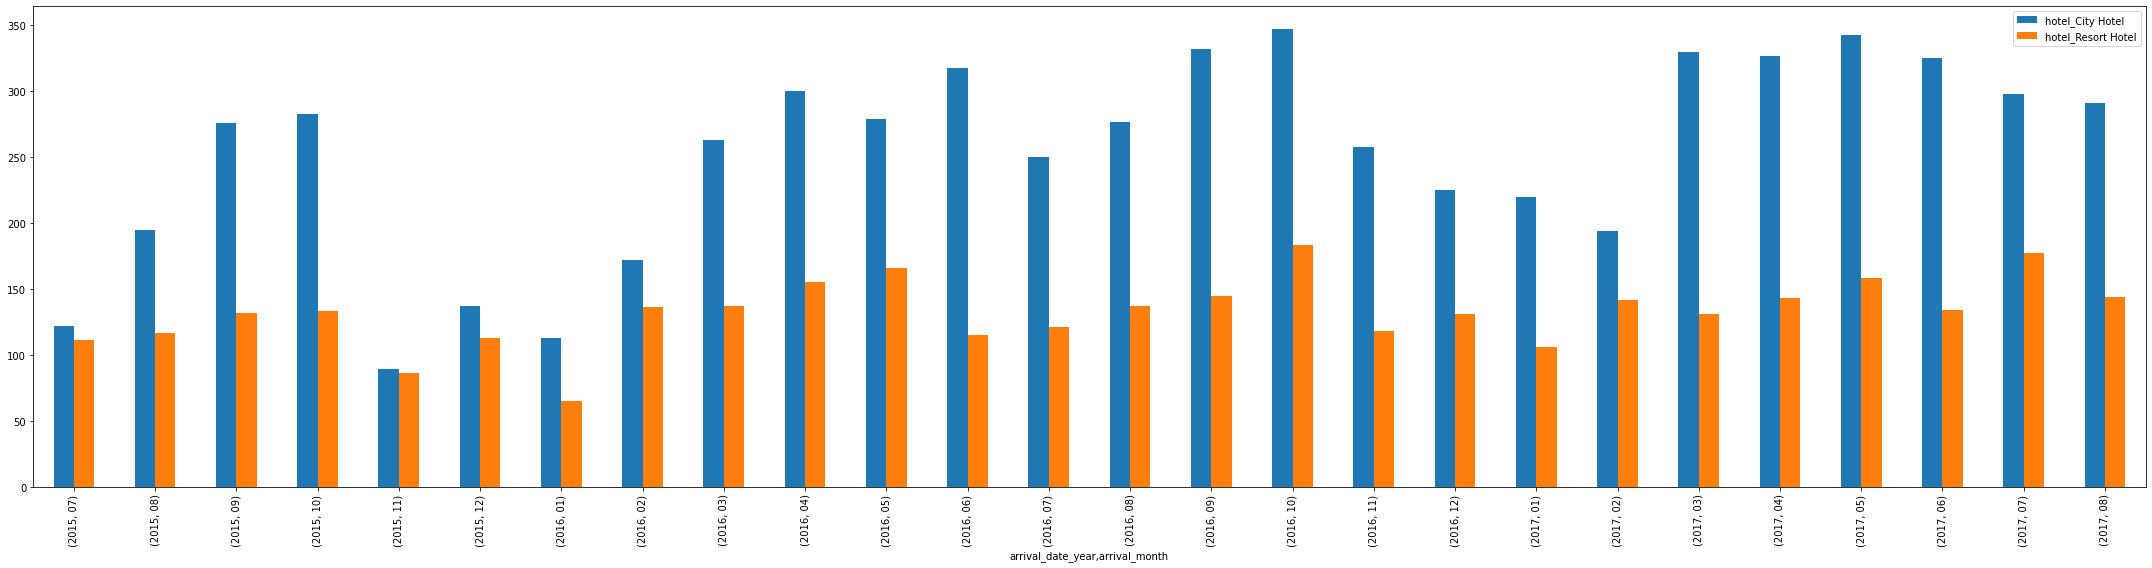

In [ ]:
plt.figure(figsize=(500,10));
data_hotel_and_date.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### is_canceled

Se trata de unas de las variables más importantes, pues sería interesante tratar de predecirla en un futuro.

In [ ]:
data['is_canceled'].describe()

count    10000.000000
mean         0.375100
std          0.484173
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

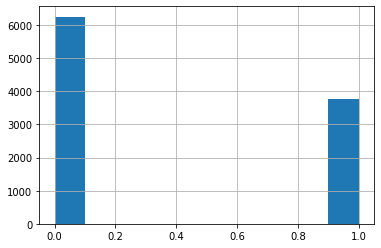

In [ ]:
data['is_canceled'].hist()

##### Evolución histórica

In [ ]:
data_canceled_and_date = data[['arrival_date_year', 'arrival_month', 'is_canceled']].groupby(by=['arrival_date_year', 'arrival_month']).sum()
data_canceled_and_date.head()

is_canceled
arrival_date_year arrival_month             
2015              07                     106
                  08                     139
                  09                     167
                  10                     129
                  11                      43

<Figure size 36000x720 with 0 Axes>

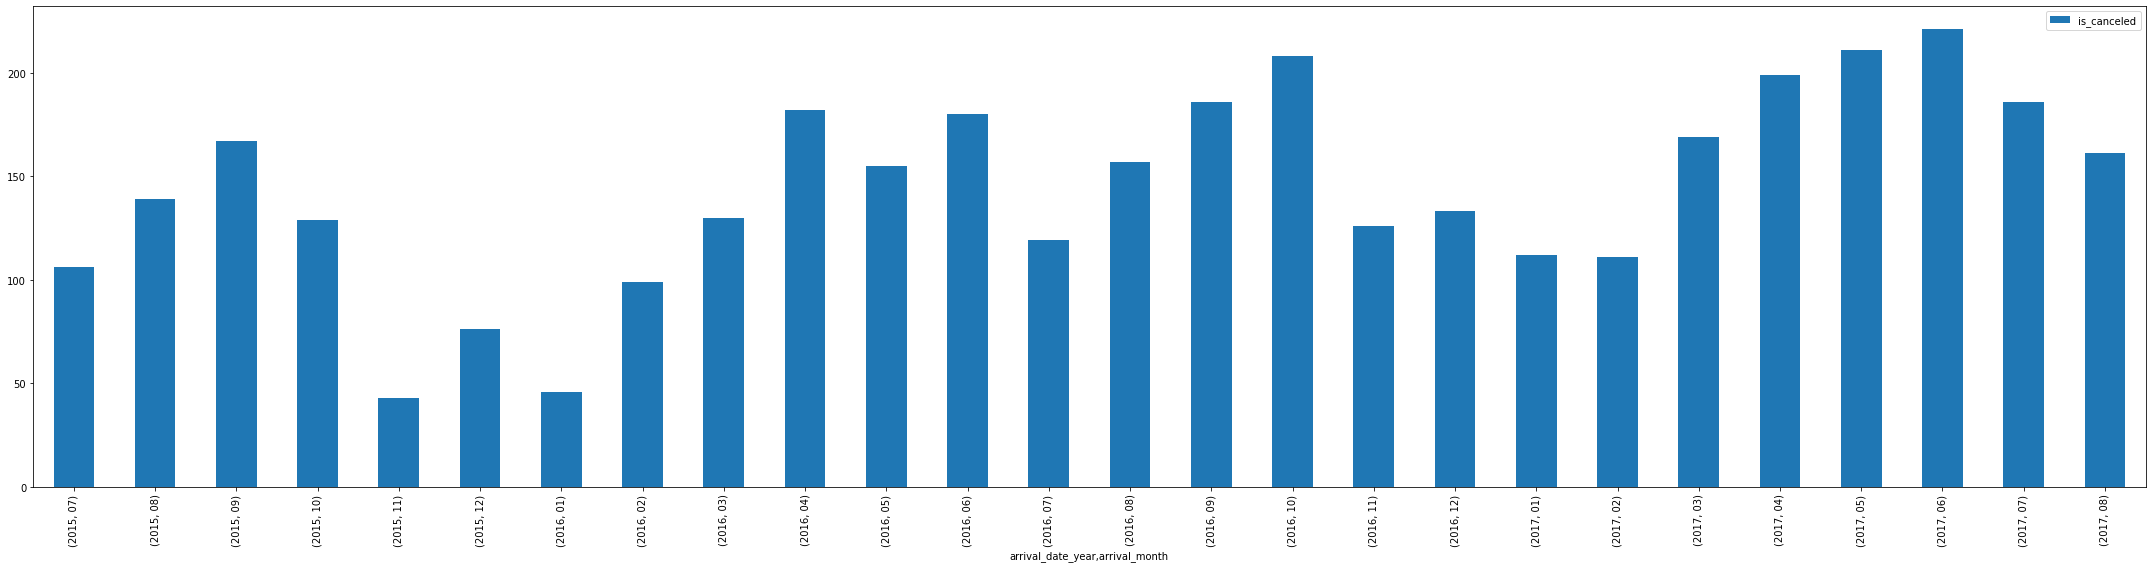

In [ ]:
plt.figure(figsize=(500,10));
data_canceled_and_date.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### lead_time 	


In [ ]:
data['lead_time'].describe()

count    10000.000000
mean       105.393800
std        108.267682
min          0.000000
25%         18.000000
50%         70.000000
75%        164.000000
max        629.000000
Name: lead_time, dtype: float64

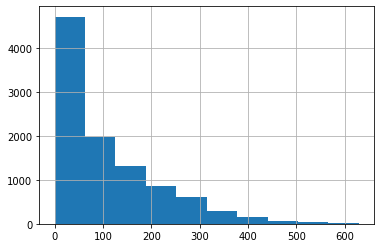

In [ ]:
data['lead_time'].hist()

##### Evolución histórica
Vamos a mostrar como ha ido evolucionando la variable a lo largo de cada mes.

In [ ]:
data_lead_time_and_date = data[['arrival_date_year', 'arrival_month', 'lead_time']].groupby(by=['arrival_date_year', 'arrival_month']).sum()
data_lead_time_and_date.head()

lead_time
arrival_date_year arrival_month           
2015              07                 30640
                  08                 32627
                  09                 50643
                  10                 42165
                  11                  7546

<Figure size 36000x720 with 0 Axes>

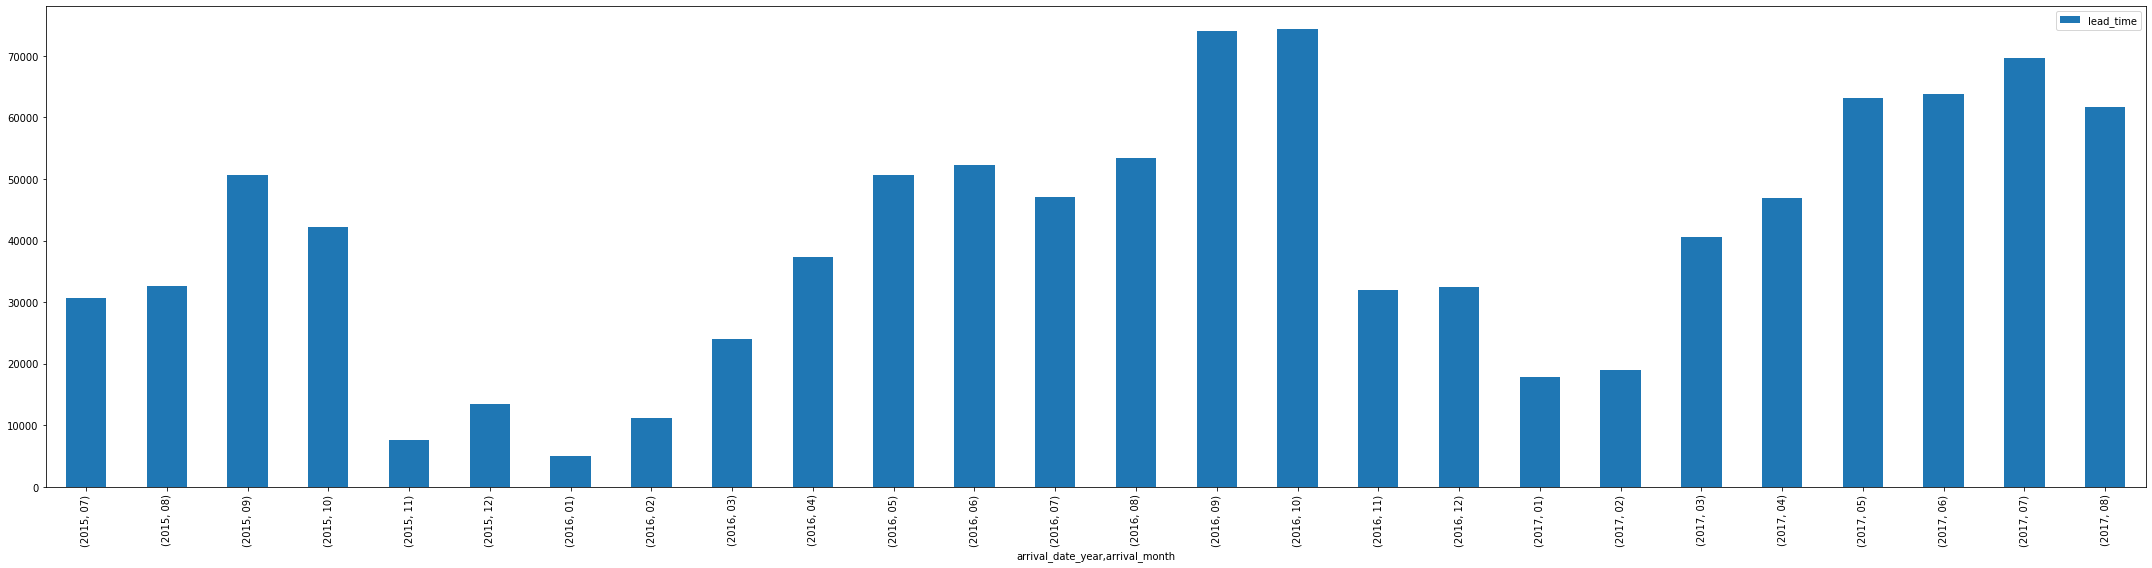

In [ ]:
plt.figure(figsize=(500,10));
data_lead_time_and_date.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

KeyError: ignored

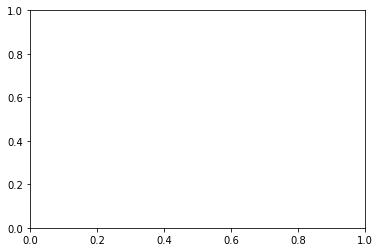

In [ ]:
data_lead_time_and_date.plot.scatter(x=['arrival_date_year', 'arrival_month'], y=['lead_time'])

### arrival_date_year 	

In [ ]:
data['arrival_date_year'].describe()

count    10000.000000
mean      2016.166900
std          0.705616
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64

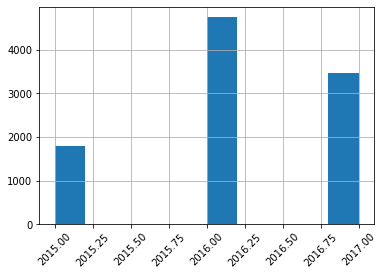

In [ ]:
plt.xticks(rotation=45)
data['arrival_date_year'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del año y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_year = pd.crosstab(data['arrival_date_year'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_year

is_canceled,0,1
arrival_date_year,,
2015,0.632107,0.367893
2016,0.637149,0.362851
2017,0.604389,0.395611


<Figure size 36000x720 with 0 Axes>

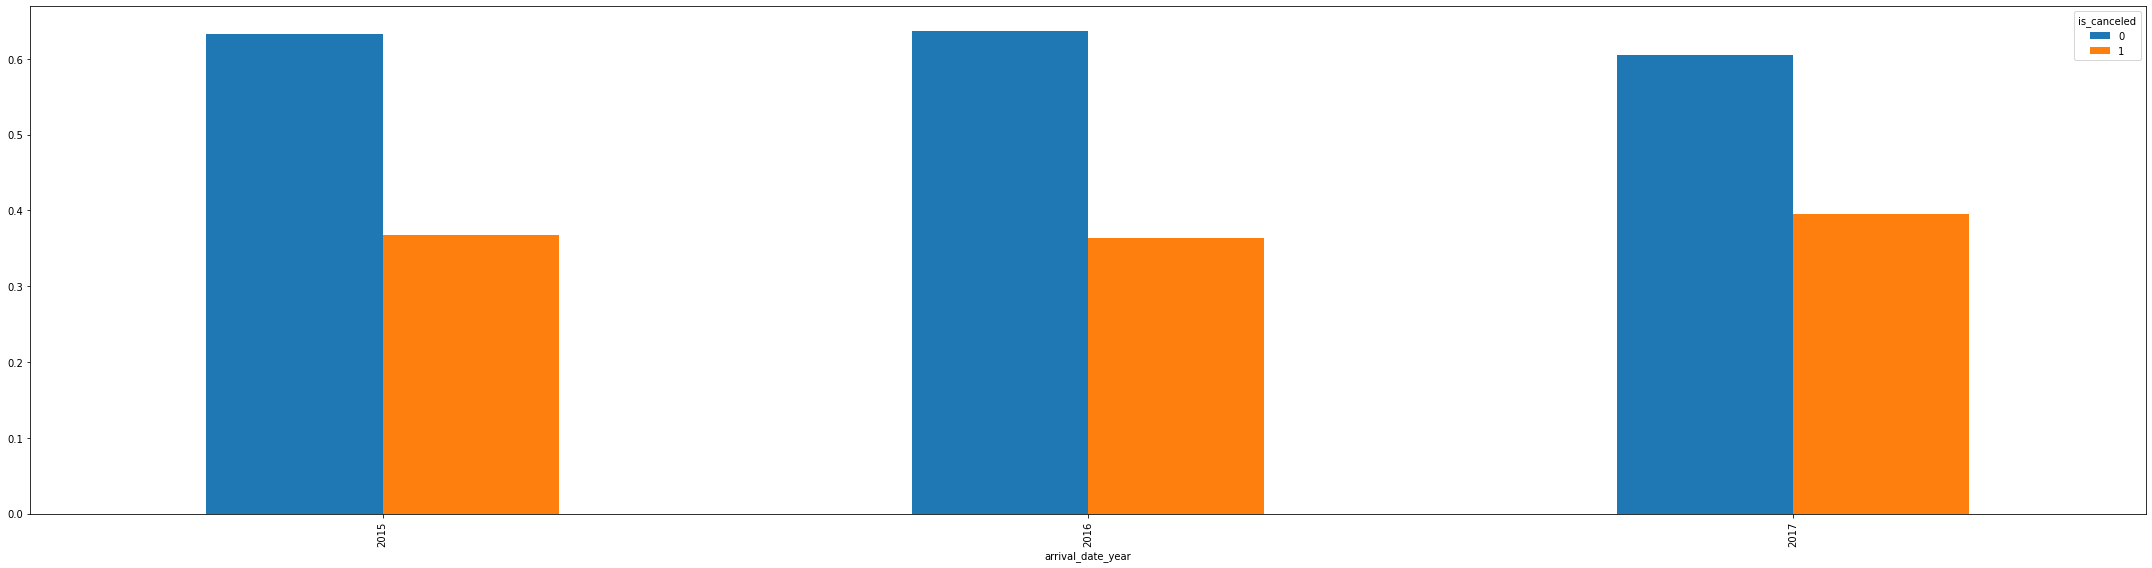

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_year.plot.bar(figsize=(30,8));
plt.tight_layout()

##### Comparación con is_canceled
Vamos a agrupar por año para ver como han ido cambiando las cancelaciones a lo largo de los años.

In [ ]:
data_year_and_canceled = data[['arrival_date_year', 'is_canceled']]
data_year_and_canceled = data_year_and_canceled.groupby(by=['arrival_date_year']).sum()
data_year_and_canceled

,is_canceled
arrival_date_year,
2015,660
2016,1721
2017,1370


<Figure size 36000x720 with 0 Axes>

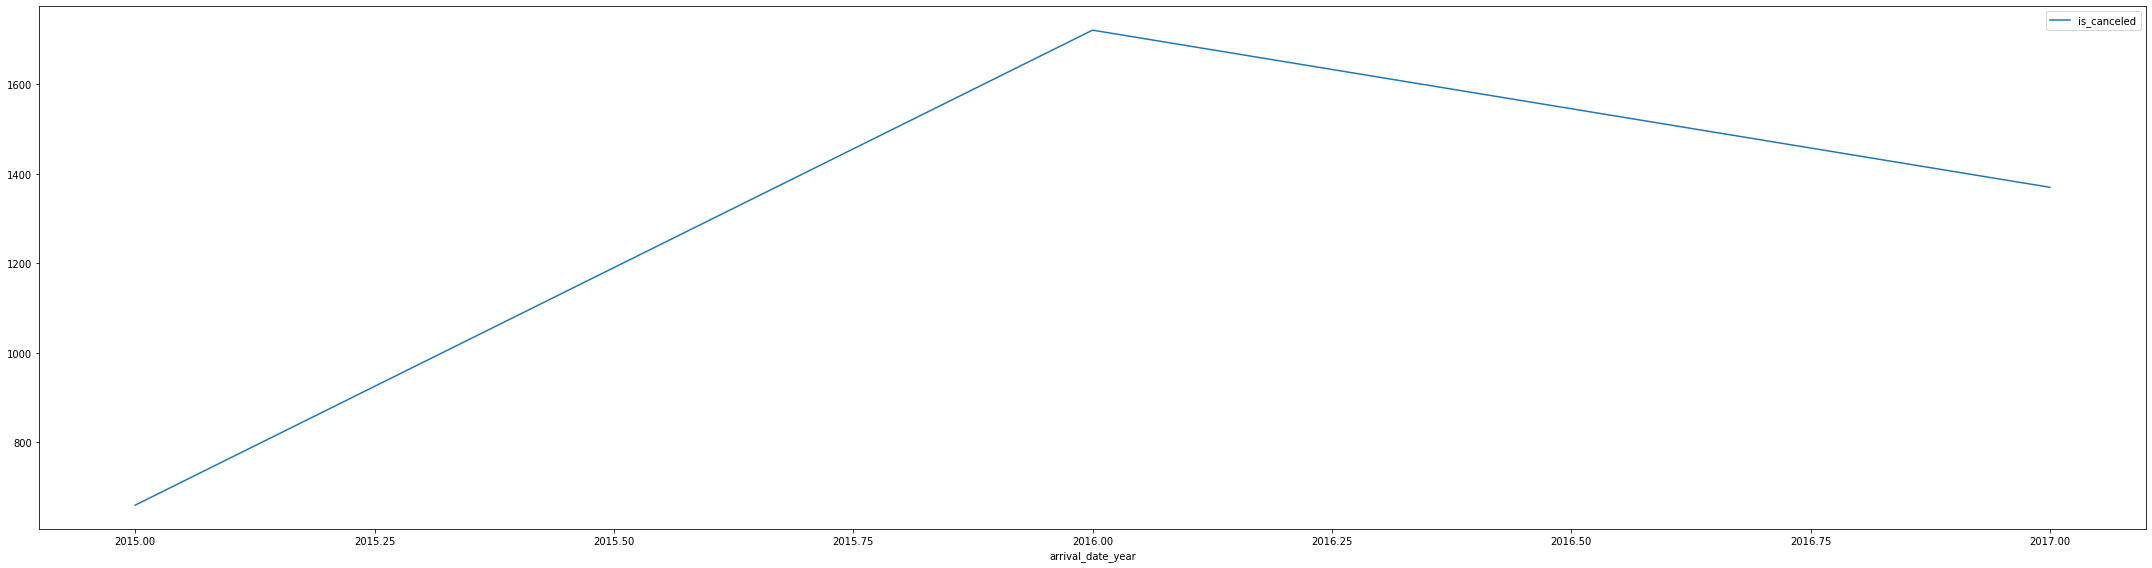

In [ ]:
plt.figure(figsize=(500,10));
data_year_and_canceled.plot(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### arrival_month 	
Usamos arrival_month(numérica), en lugar de arrival_date_month(categórica), pues son equivalentes.

In [ ]:
data['arrival_month'].describe()

count     10000
unique       12
top          08
freq       1161
Name: arrival_month, dtype: object

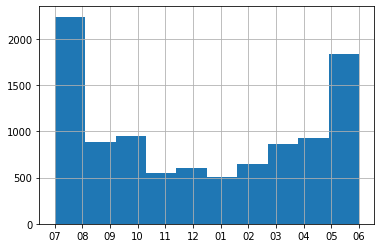

In [ ]:
data['arrival_month'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del mes y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_month = pd.crosstab(data['arrival_month'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_month

is_canceled,0,1
arrival_month,,
01,0.686508,0.313492
02,0.673913,0.326087
03,0.652729,0.347271
04,0.588108,0.411892
05,0.613108,0.386892
06,0.550448,0.449552
07,0.619092,0.380908
08,0.606374,0.393626
09,0.601130,0.398870


<Figure size 36000x720 with 0 Axes>

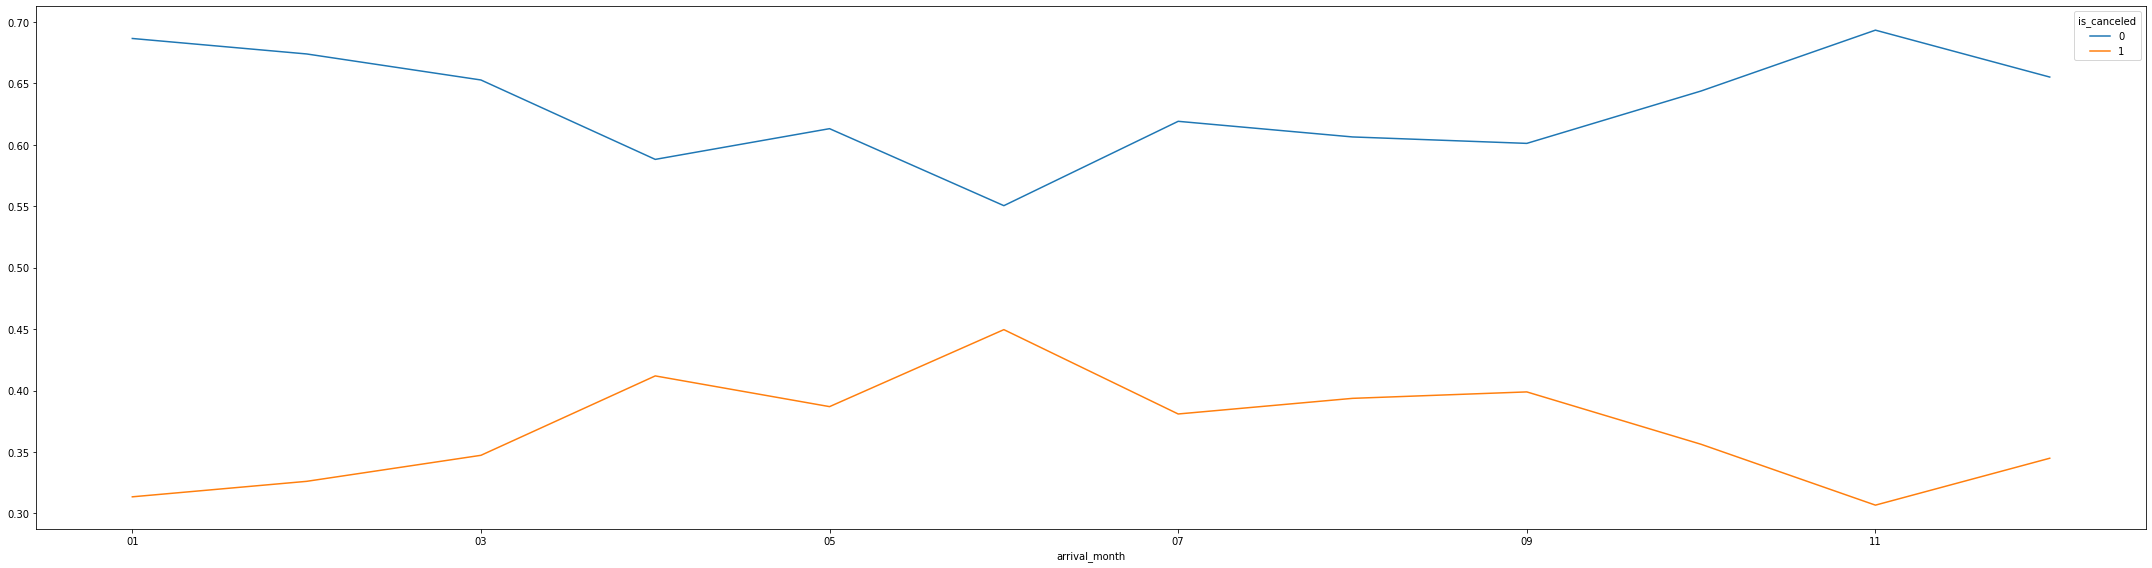

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_month.plot(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por mes para ver como han ido cambiando las cancelaciones a lo largo de los meses.

In [ ]:
data_month_and_canceled = data[['arrival_month', 'is_canceled']]
data_month_and_canceled = data_month_and_canceled.groupby(by=['arrival_month']).sum()
data_month_and_canceled

,is_canceled
arrival_month,
01,158
02,210
03,299
04,381
05,366
06,401
07,411
08,457
09,353


<Figure size 36000x720 with 0 Axes>

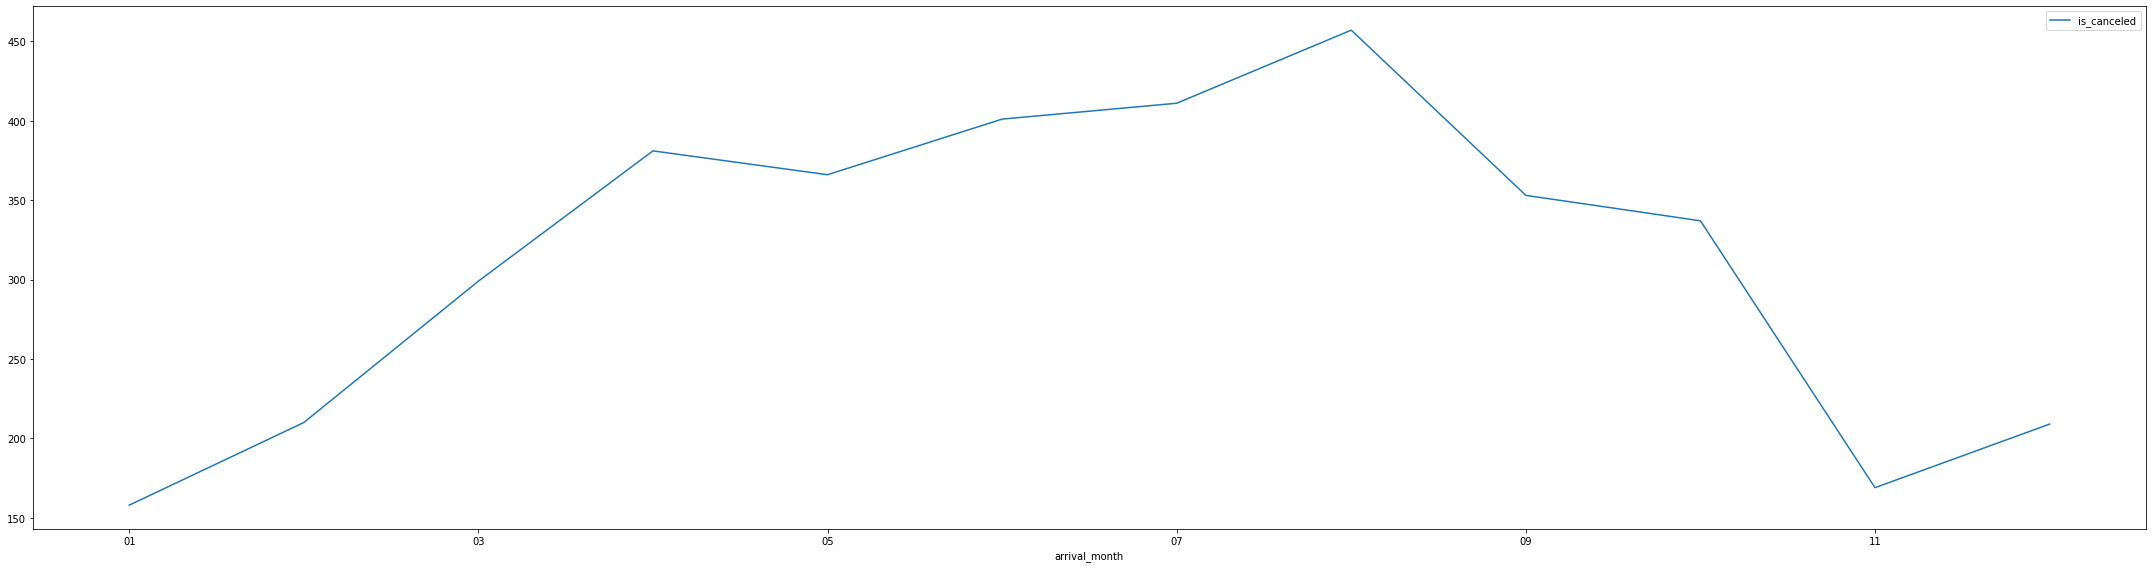

In [ ]:
plt.figure(figsize=(500,10));
data_month_and_canceled.plot(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### arrival_date_week_number 	

In [ ]:
data['arrival_date_week_number'].describe()

count    10000.000000
mean        27.267700
std         13.671588
min          1.000000
25%         16.000000
50%         28.000000
75%         38.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64

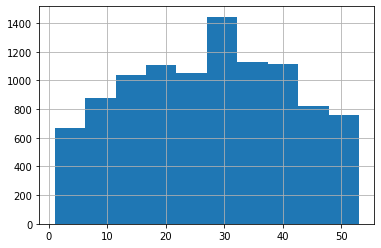

In [ ]:
data['arrival_date_week_number'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función de la semana y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_weeknumber = pd.crosstab(data['arrival_date_week_number'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_weeknumber.head()

is_canceled,0,1
arrival_date_week_number,,
1,0.619048,0.380952
2,0.611650,0.388350
3,0.750000,0.250000
4,0.685484,0.314516
5,0.685950,0.314050


<Figure size 36000x720 with 0 Axes>

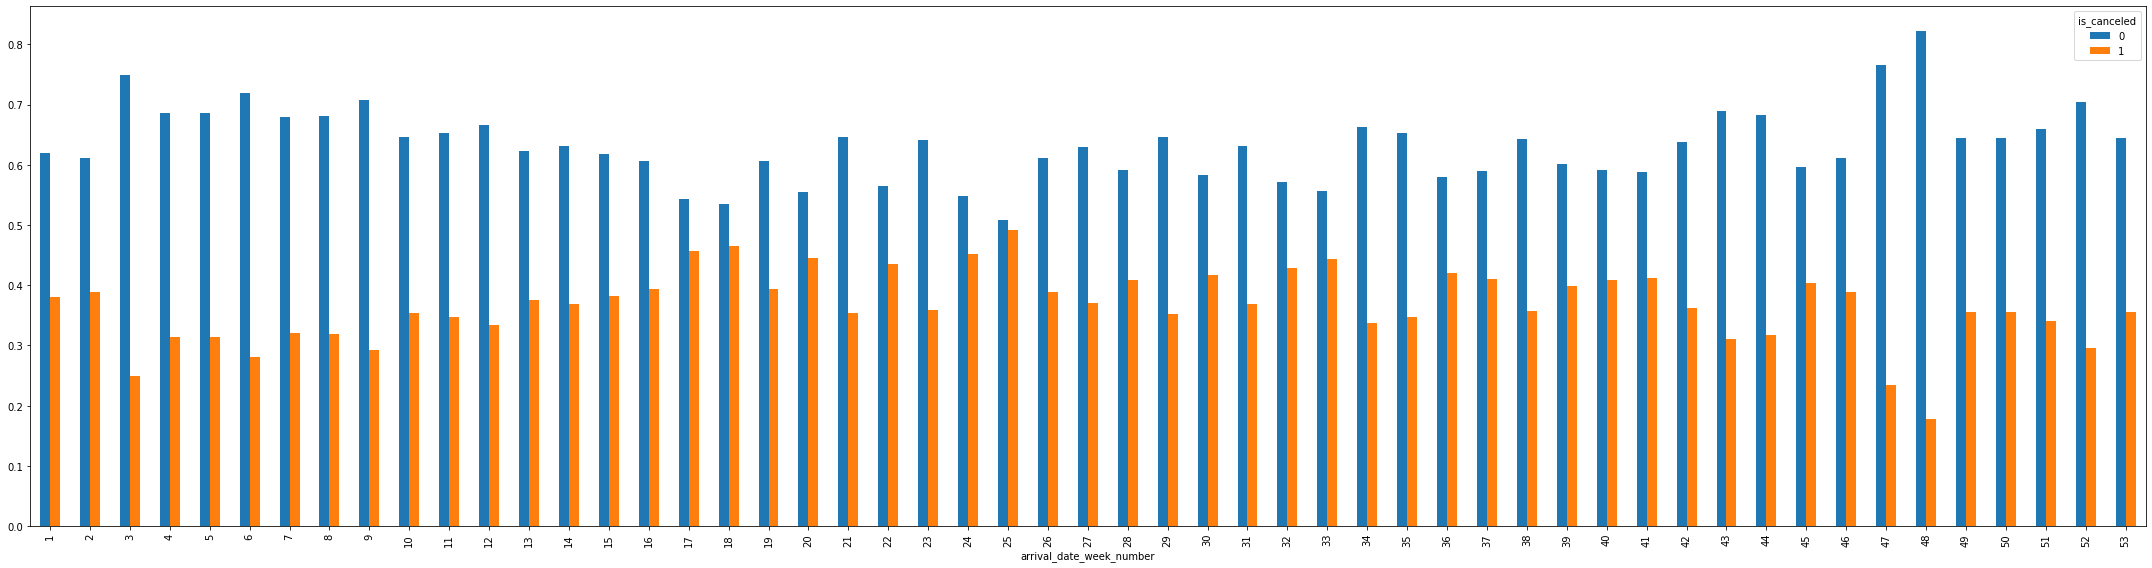

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_weeknumber.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por el número de la semana para ver como han ido cambiando las cancelaciones a lo largo de las mismas.

In [ ]:
data_week_and_canceled = data[['arrival_date_week_number', 'is_canceled']]
data_week_and_canceled = data_week_and_canceled.groupby(by=['arrival_date_week_number']).sum()
data_week_and_canceled.head()

,is_canceled
arrival_date_week_number,
1,32
2,40
3,29
4,39
5,38


<Figure size 36000x720 with 0 Axes>

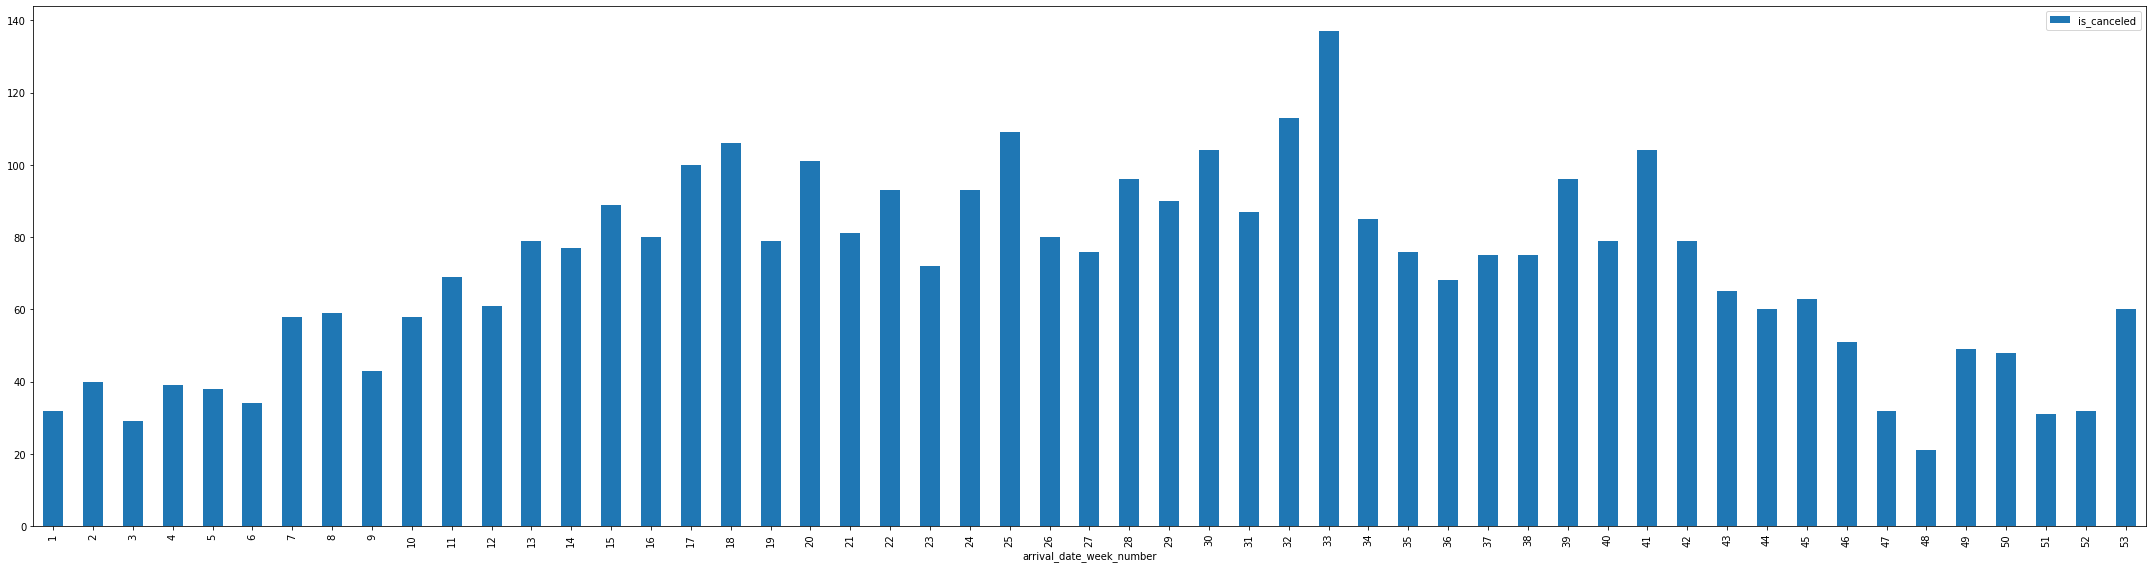

In [ ]:
plt.figure(figsize=(500,10));
data_week_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### arrival_date_day_of_month 	

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del día del mes y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_daynumber = pd.crosstab(data['arrival_date_day_of_month'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_daynumber.head()

is_canceled,0,1
arrival_date_day_of_month,,
1,0.564286,0.435714
2,0.658610,0.341390
3,0.603125,0.396875
4,0.637363,0.362637
5,0.623188,0.376812


<Figure size 36000x720 with 0 Axes>

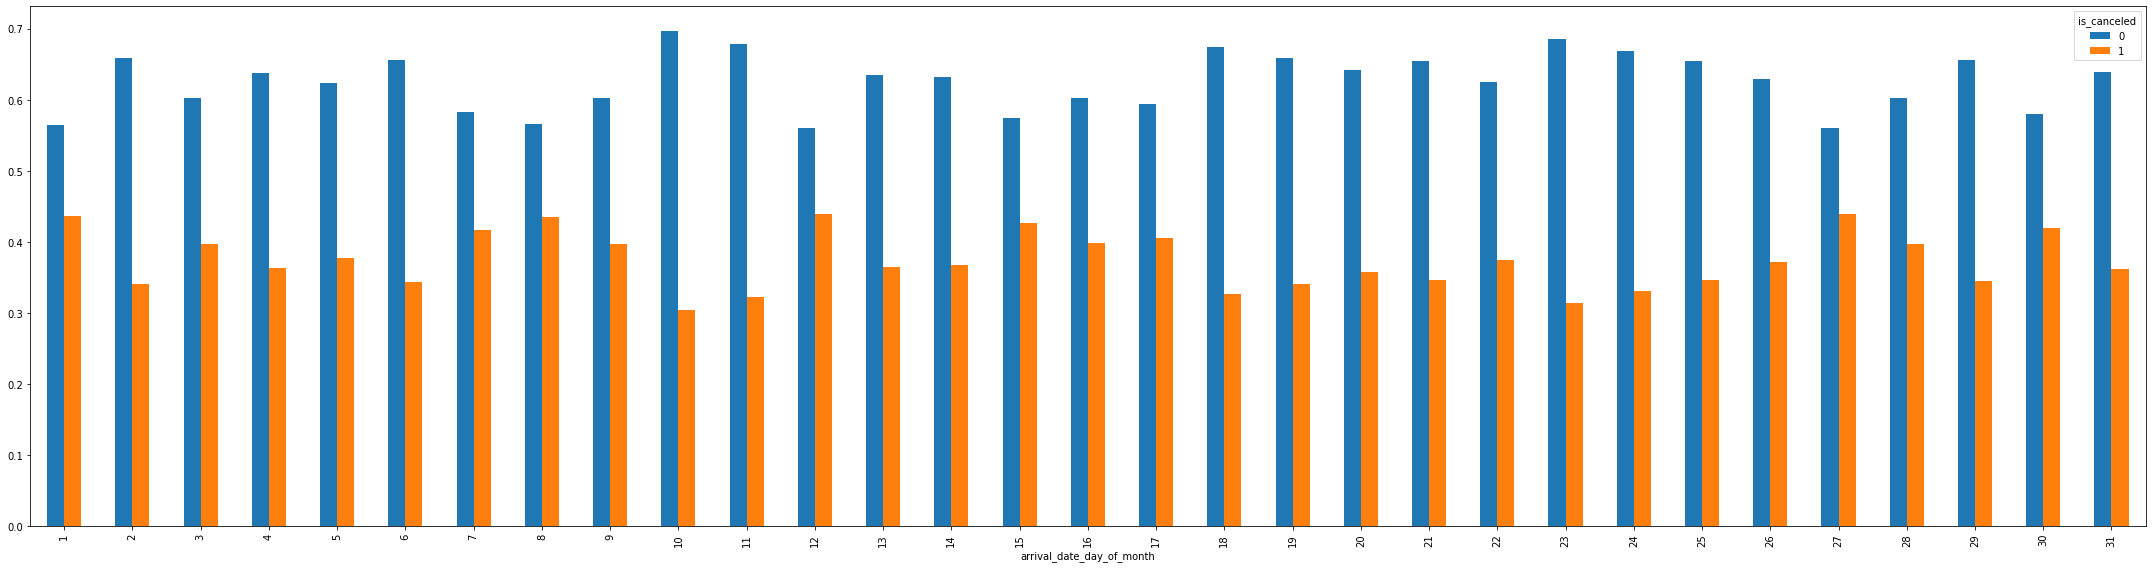

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_daynumber.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

##### Comparación con is_canceled
Vamos a agrupar por día del mes para ver como han ido cambiando las cancelaciones a lo largo de los mismos.

In [ ]:
data_day_and_canceled = data[['arrival_date_day_of_month', 'is_canceled']]
data_day_and_canceled = data_day_and_canceled.groupby(by=['arrival_date_day_of_month']).sum()
data_day_and_canceled.head()

,is_canceled
arrival_date_day_of_month,
1,122
2,113
3,127
4,99
5,130


<Figure size 36000x720 with 0 Axes>

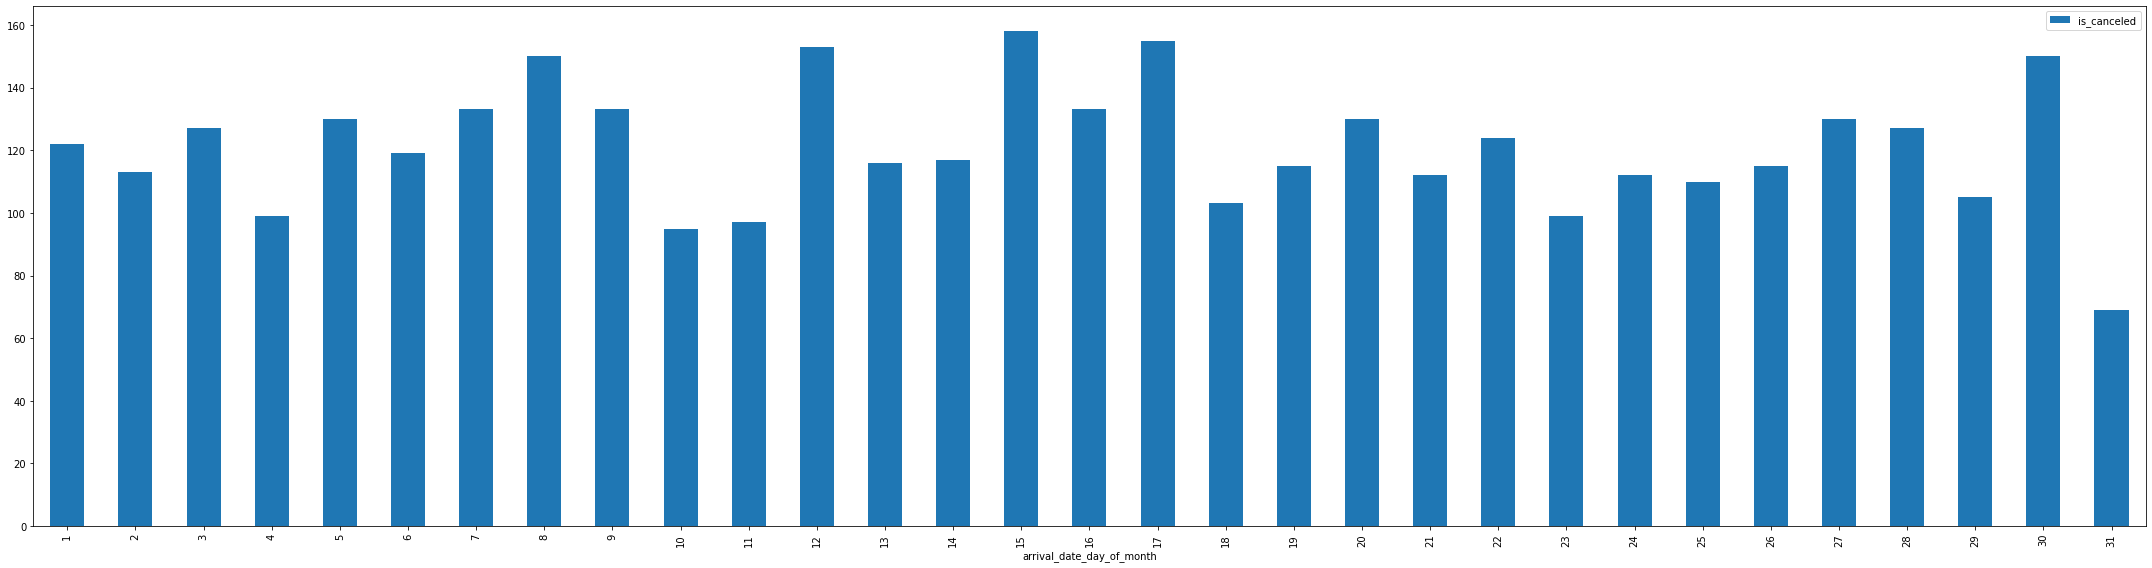

In [ ]:
plt.figure(figsize=(500,10));
data_day_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### stays_in_weekend_nights 	

In [ ]:
data['stays_in_weekend_nights'].describe()

count    10000.000000
mean         0.927100
std          0.990396
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: stays_in_weekend_nights, dtype: float64

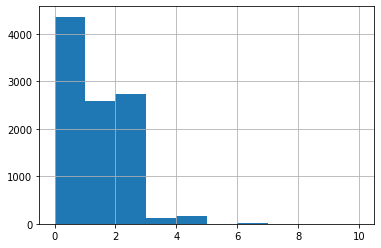

In [ ]:
data['stays_in_weekend_nights'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de noches de fin de semana y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_weekend_nights = pd.crosstab(data['stays_in_weekend_nights'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_weekend_nights

is_canceled,0,1
stays_in_weekend_nights,,
0,0.622447,0.377553
1,0.626595,0.373405
2,0.623495,0.376505
3,0.623932,0.376068
4,0.713450,0.286550
5,0.000000,1.000000
6,0.588235,0.411765
7,0.000000,1.000000
8,0.500000,0.500000


Aquí se pueden ver algunos detalles significativos. Cuando se reservan 10 noches de fin de semana NADIE ha cancelado nunca la reserva. Y cuando se reservan 7 noches de fin de semana, TODO el mundo ha cancelado la reserva.

<Figure size 36000x720 with 0 Axes>

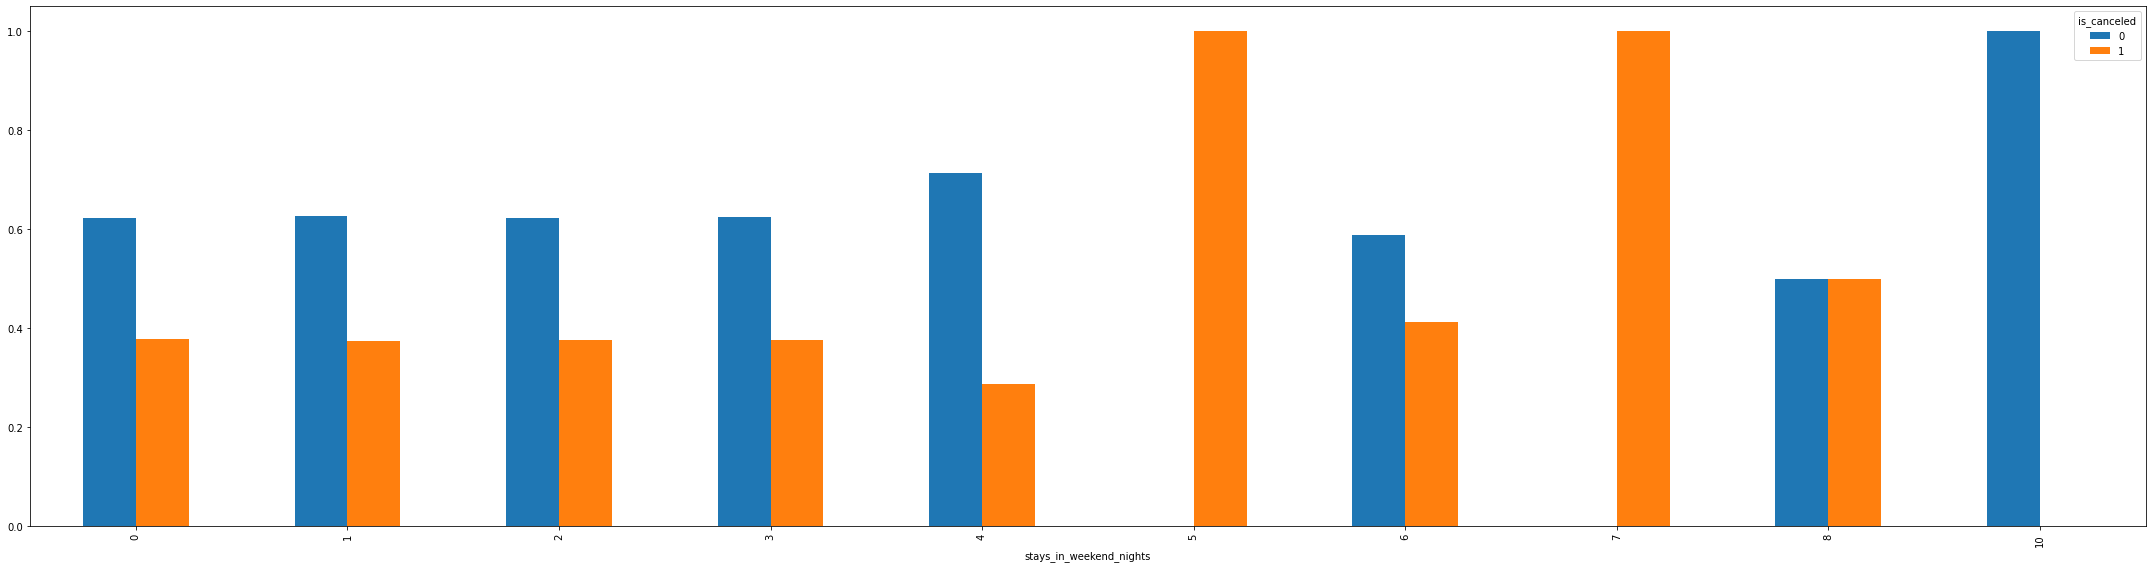

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_weekend_nights.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

##### Comparación con is_canceled
Vamos a agrupar por la variable para ver como han ido cambiando las cancelaciones en función de la misma.

In [ ]:
data_weekend_nights_and_canceled = data[['stays_in_weekend_nights', 'is_canceled']]
data_weekend_nights_and_canceled = data_weekend_nights_and_canceled.groupby(by=['stays_in_weekend_nights']).sum()
data_weekend_nights_and_canceled

,is_canceled
stays_in_weekend_nights,
0,1645
1,966
2,1032
3,44
4,49
5,5
6,7
7,2
8,1


Al ver estos resultado se aprecia que la probabilidad de antes es engañosa, ya que se debe a muestras muy pequeñas o incluso vacías.

<Figure size 36000x720 with 0 Axes>

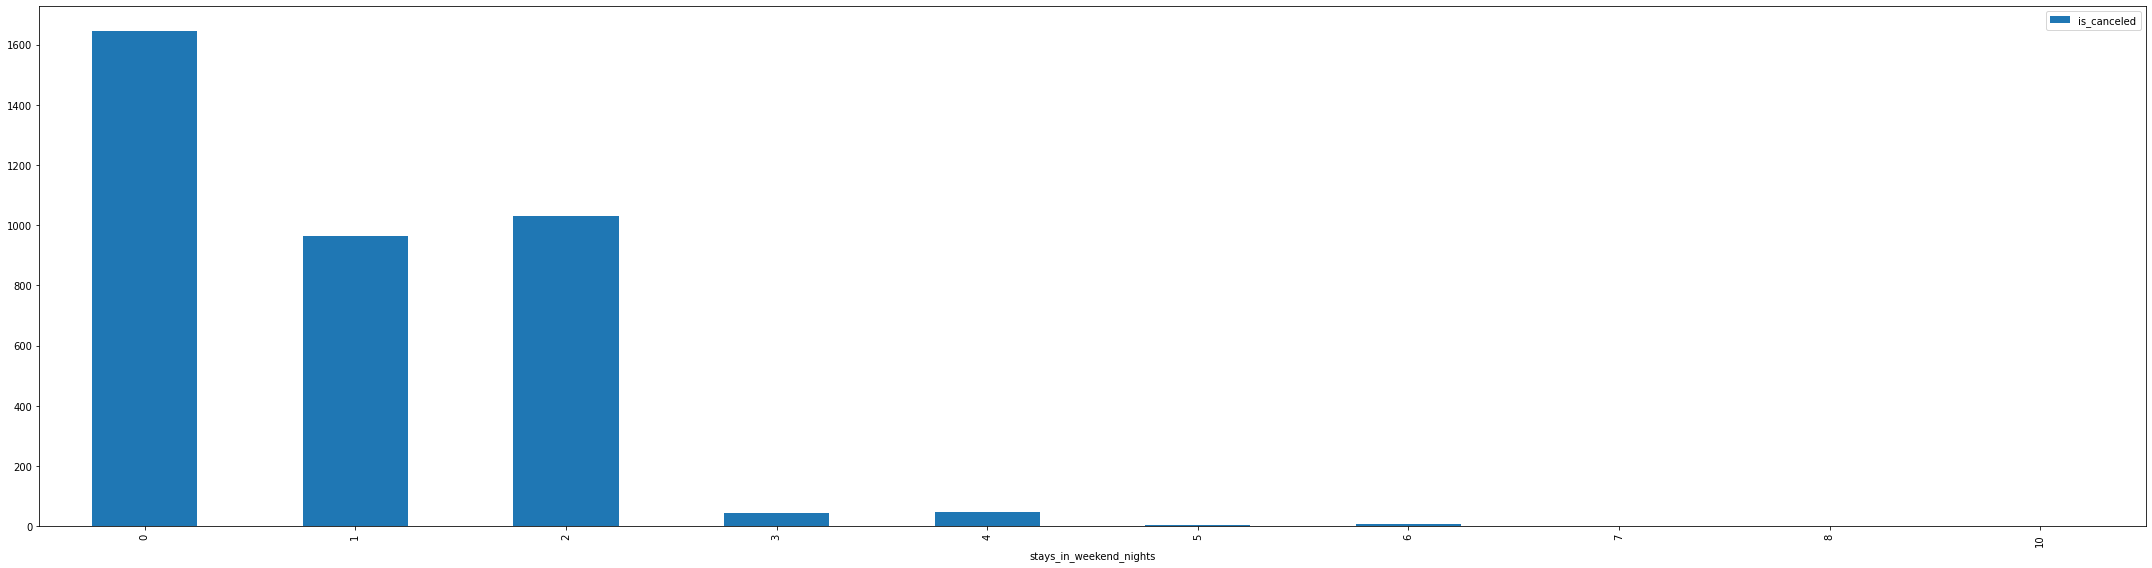

In [ ]:
plt.figure(figsize=(500,10));
data_weekend_nights_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### stays_in_week_nights 	

In [ ]:
data['stays_in_week_nights'].describe()

count    10000.000000
mean         2.516500
std          1.882892
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         25.000000
Name: stays_in_week_nights, dtype: float64

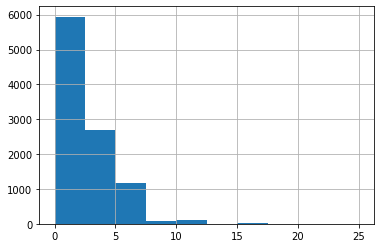

In [ ]:
data['stays_in_week_nights'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de noches entre semana y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_week_nights = pd.crosstab(data['stays_in_week_nights'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_week_nights

is_canceled,0,1
stays_in_week_nights,,
0,0.731942,0.268058
1,0.678247,0.321753
2,0.548654,0.451346
3,0.605885,0.394115
4,0.628971,0.371029
5,0.661070,0.338930
6,0.659574,0.340426
7,0.636364,0.363636
8,0.606557,0.393443


<Figure size 36000x720 with 0 Axes>

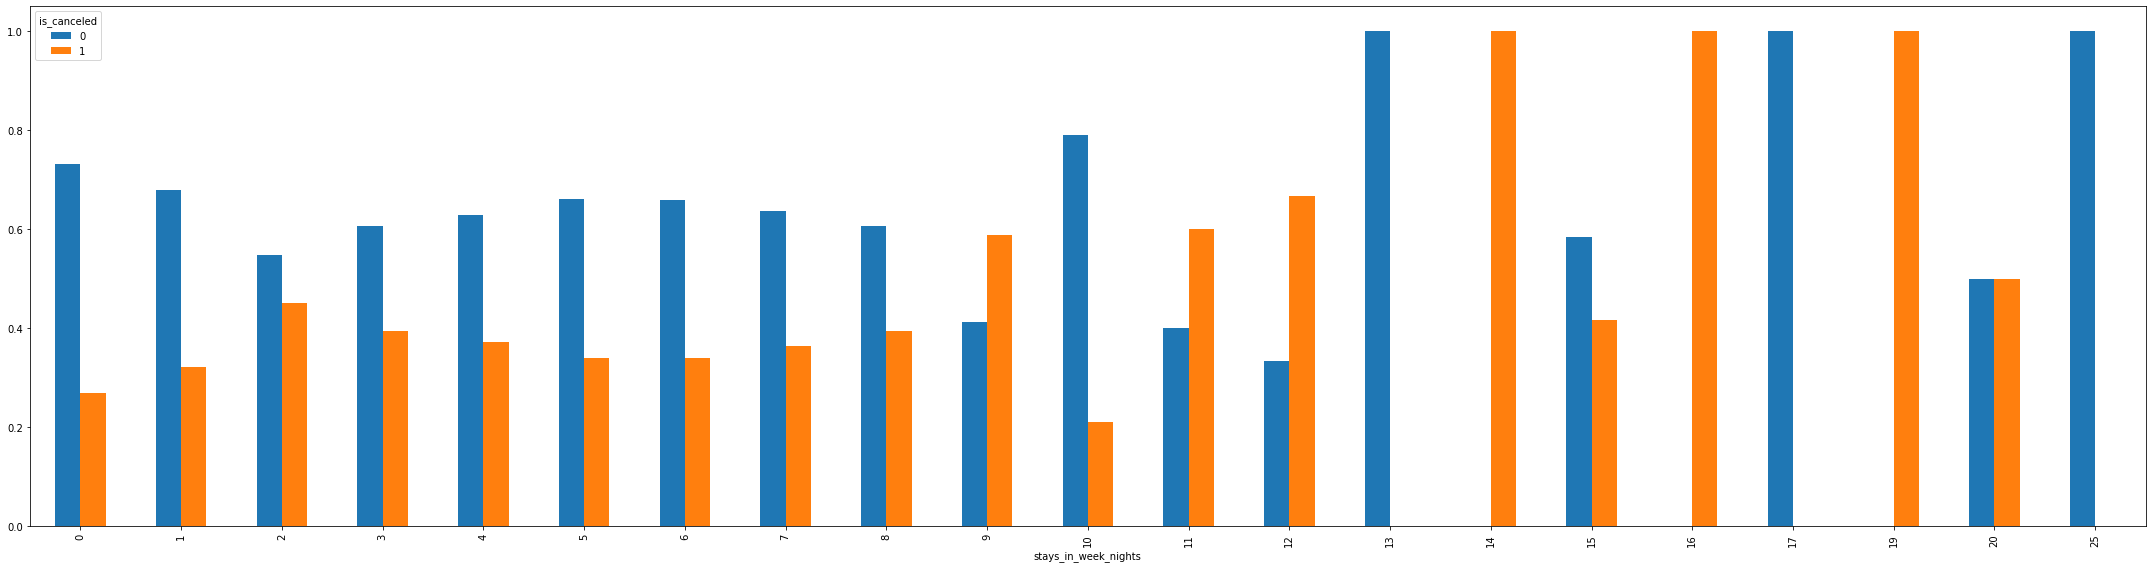

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_week_nights.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

##### Comparación con is_canceled
Vamos a agrupar por la variable para ver como han ido cambiando las cancelaciones a lo largo de la misma.

In [ ]:
data_week_nights_and_canceled = data[['stays_in_week_nights', 'is_canceled']]
data_week_nights_and_canceled = data_week_nights_and_canceled.groupby(by=['stays_in_week_nights']).sum()
data_week_nights_and_canceled

,is_canceled
stays_in_week_nights,
0,167
1,815
2,1257
3,750
4,292
5,323
6,48
7,24
8,24


<Figure size 36000x720 with 0 Axes>

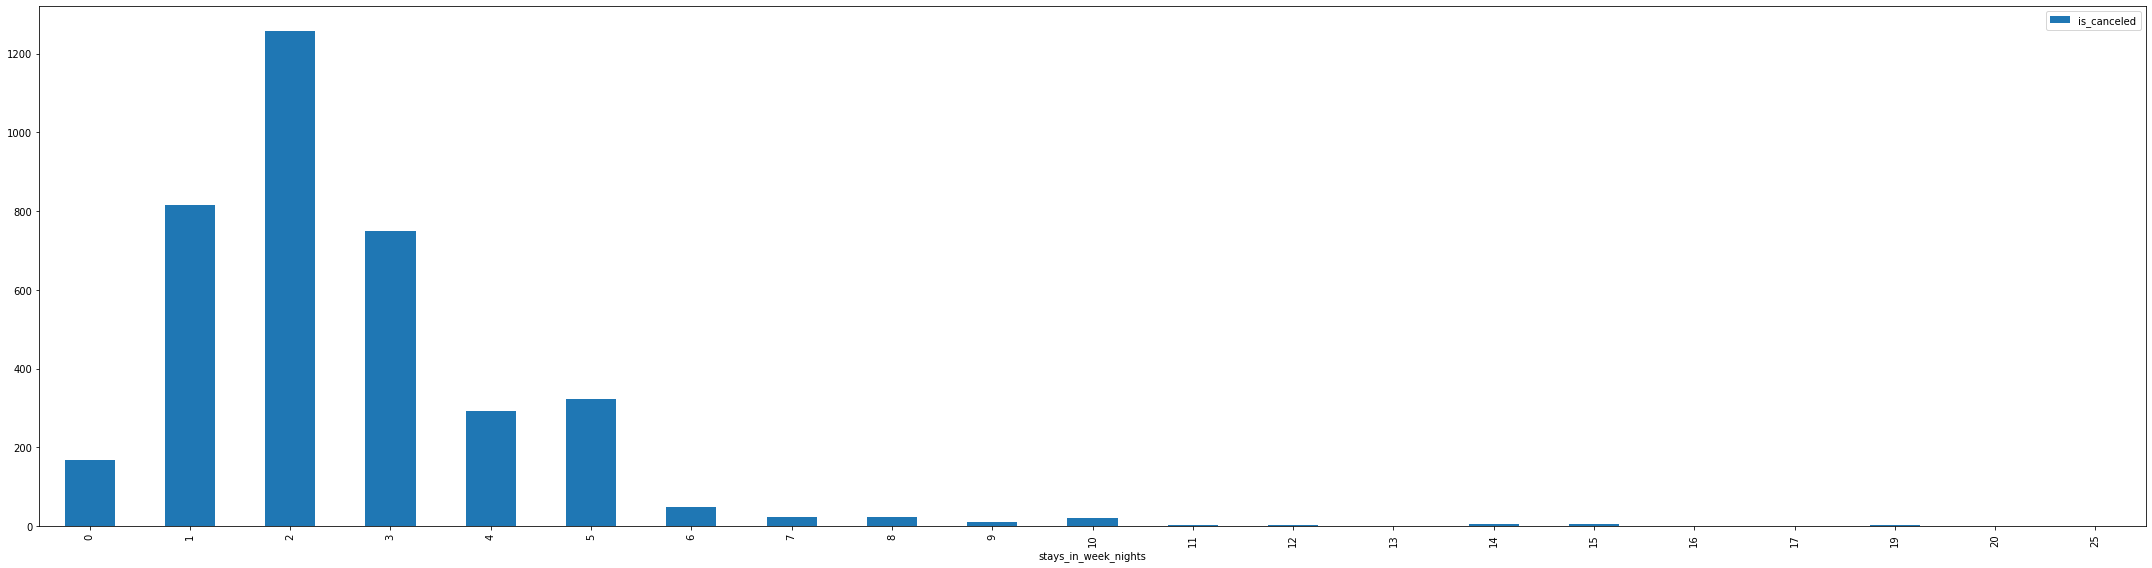

In [ ]:
plt.figure(figsize=(500,10));
data_week_nights_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### adults 	

In [ ]:
data['adults'].describe()

count    10000.000000
mean         1.869600
std          0.572912
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         27.000000
Name: adults, dtype: float64

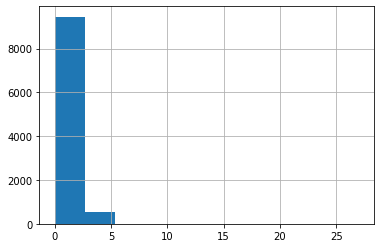

In [ ]:
data['adults'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de adultos y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_adults = pd.crosstab(data['adults'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_adults

is_canceled,0,1
adults,,
0,0.692308,0.307692
1,0.713666,0.286334
2,0.603007,0.396993
3,0.626151,0.373849
4,1.000000,0.000000
20,0.000000,1.000000
27,0.000000,1.000000


<Figure size 36000x720 with 0 Axes>

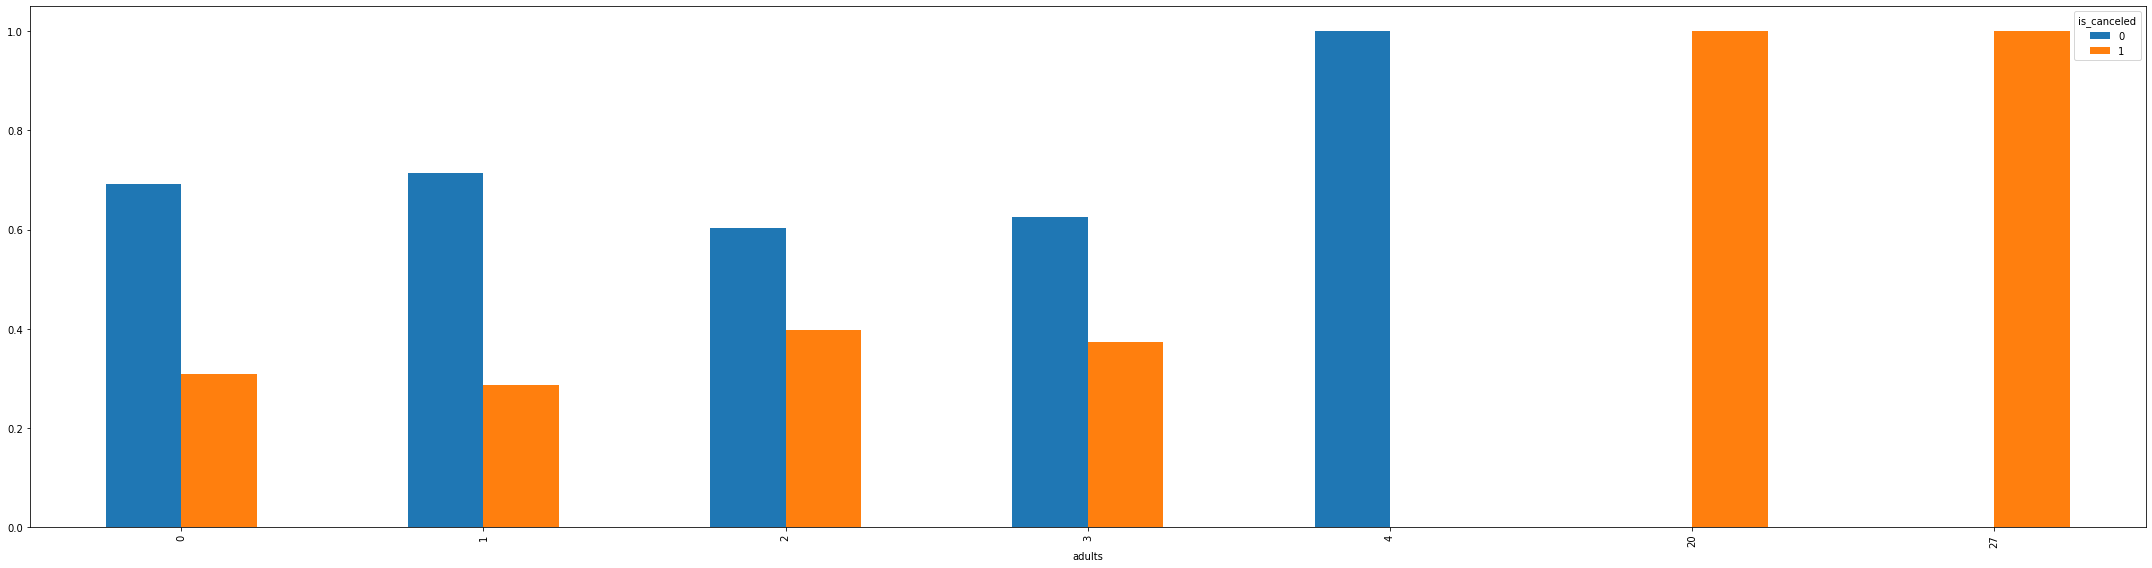

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_adults.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por el número de adultos para ver como han ido cambiando las cancelaciones en función de los mismos.

In [ ]:
data_adults_and_canceled = data[['adults', 'is_canceled']]
data_adults_and_canceled = data_adults_and_canceled.groupby(by=['adults']).sum()
data_adults_and_canceled

,is_canceled
adults,
0,8
1,528
2,3010
3,203
4,0
20,1
27,1


<Figure size 36000x720 with 0 Axes>

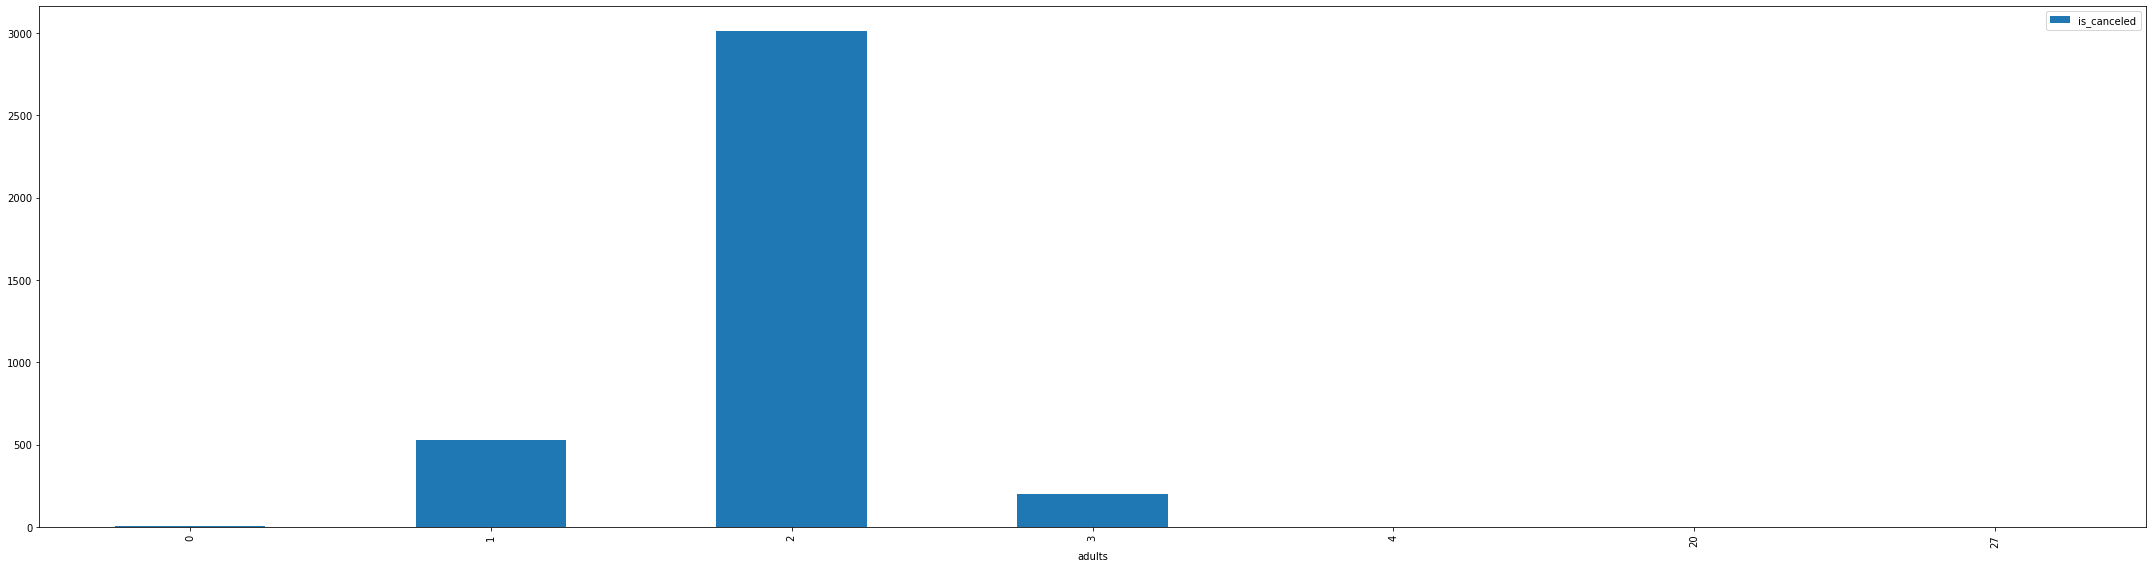

In [ ]:
plt.figure(figsize=(500,10));
data_adults_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### children 	

In [ ]:
data['children'].describe()

count    10000.000000
mean         0.108000
std          0.405157
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: children, dtype: float64

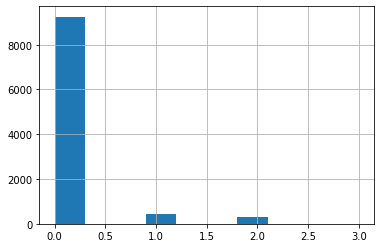

In [ ]:
data['children'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de niños y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_children = pd.crosstab(data['children'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_children

is_canceled,0,1
children,,
0.0,0.625554,0.374446
1.0,0.661972,0.338028
2.0,0.552381,0.447619
3.0,0.750000,0.250000


<Figure size 36000x720 with 0 Axes>

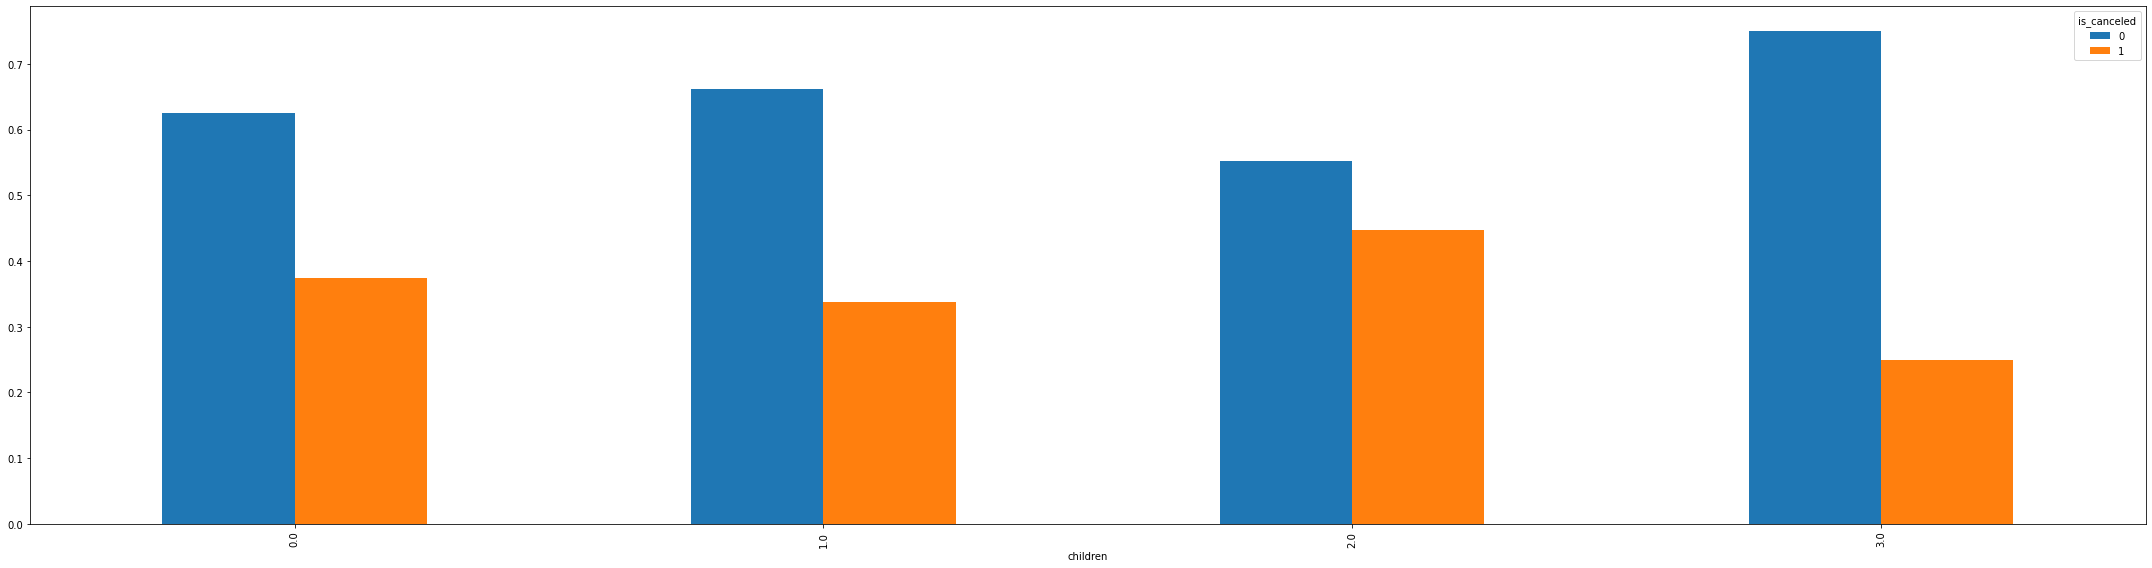

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_children.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por el número de niños para ver como han ido cambiando las cancelaciones en función de los mismos.

In [ ]:
data_children_and_canceled = data[['children', 'is_canceled']]
data_children_and_canceled = data_children_and_canceled.groupby(by=['children']).sum()
data_children_and_canceled

,is_canceled
children,
0.0,3464
1.0,144
2.0,141
3.0,2


<Figure size 36000x720 with 0 Axes>

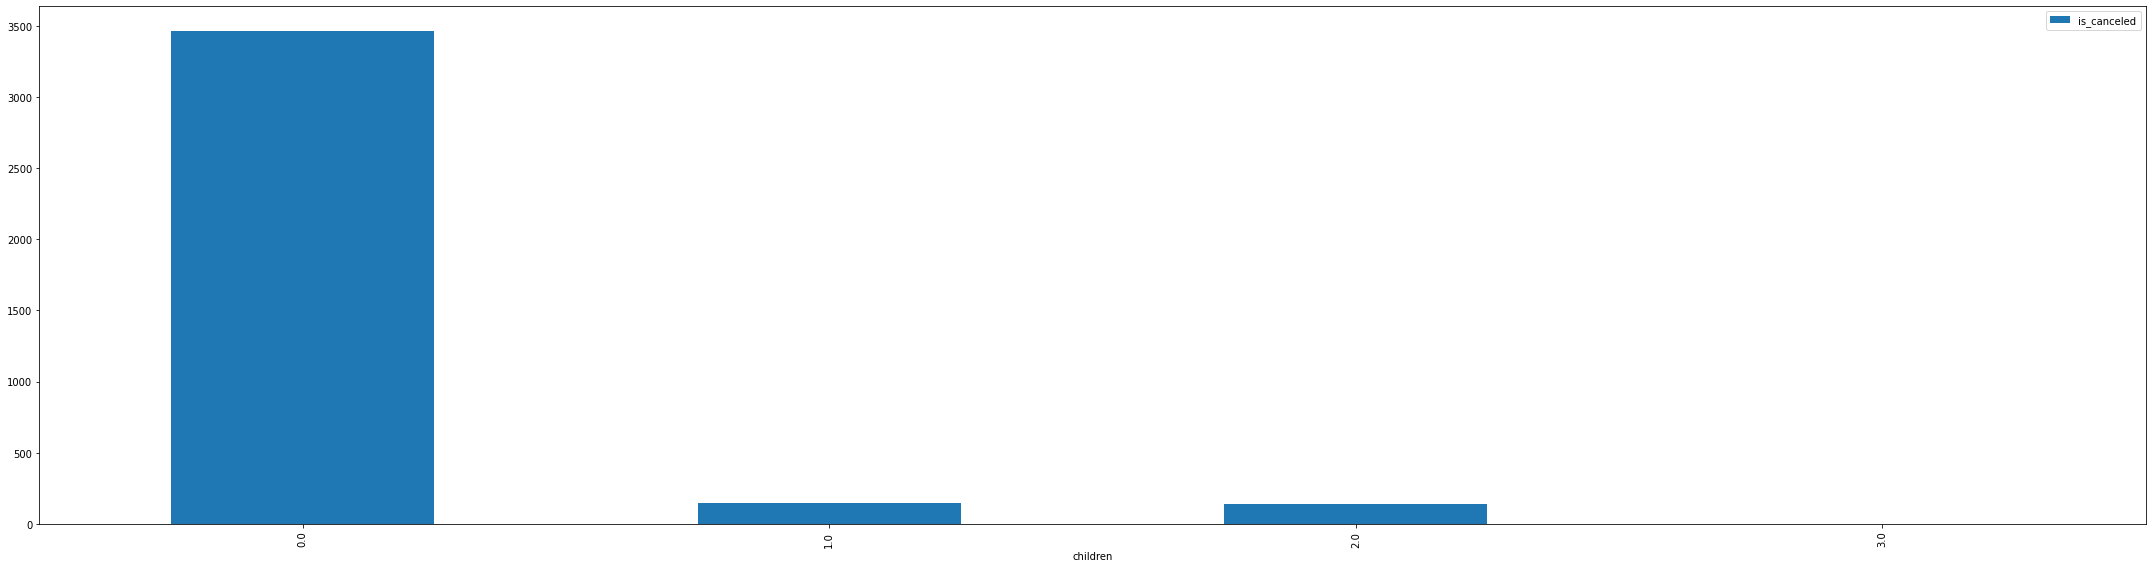

In [ ]:
plt.figure(figsize=(500,10));
data_children_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### babies

In [ ]:
data['babies'].describe()

count    10000.000000
mean         0.008500
std          0.093961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: babies, dtype: float64

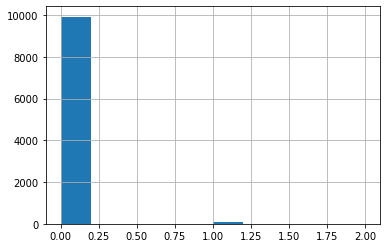

In [ ]:
data['babies'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del nñumero de bebés y pintarlo en una gráfica.

In [ ]:
data_prob_canceled_by_babies = pd.crosstab(data['babies'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_babies

is_canceled,0,1
babies,,
0,0.623576,0.376424
1,0.777778,0.222222
2,1.000000,0.000000


<Figure size 36000x720 with 0 Axes>

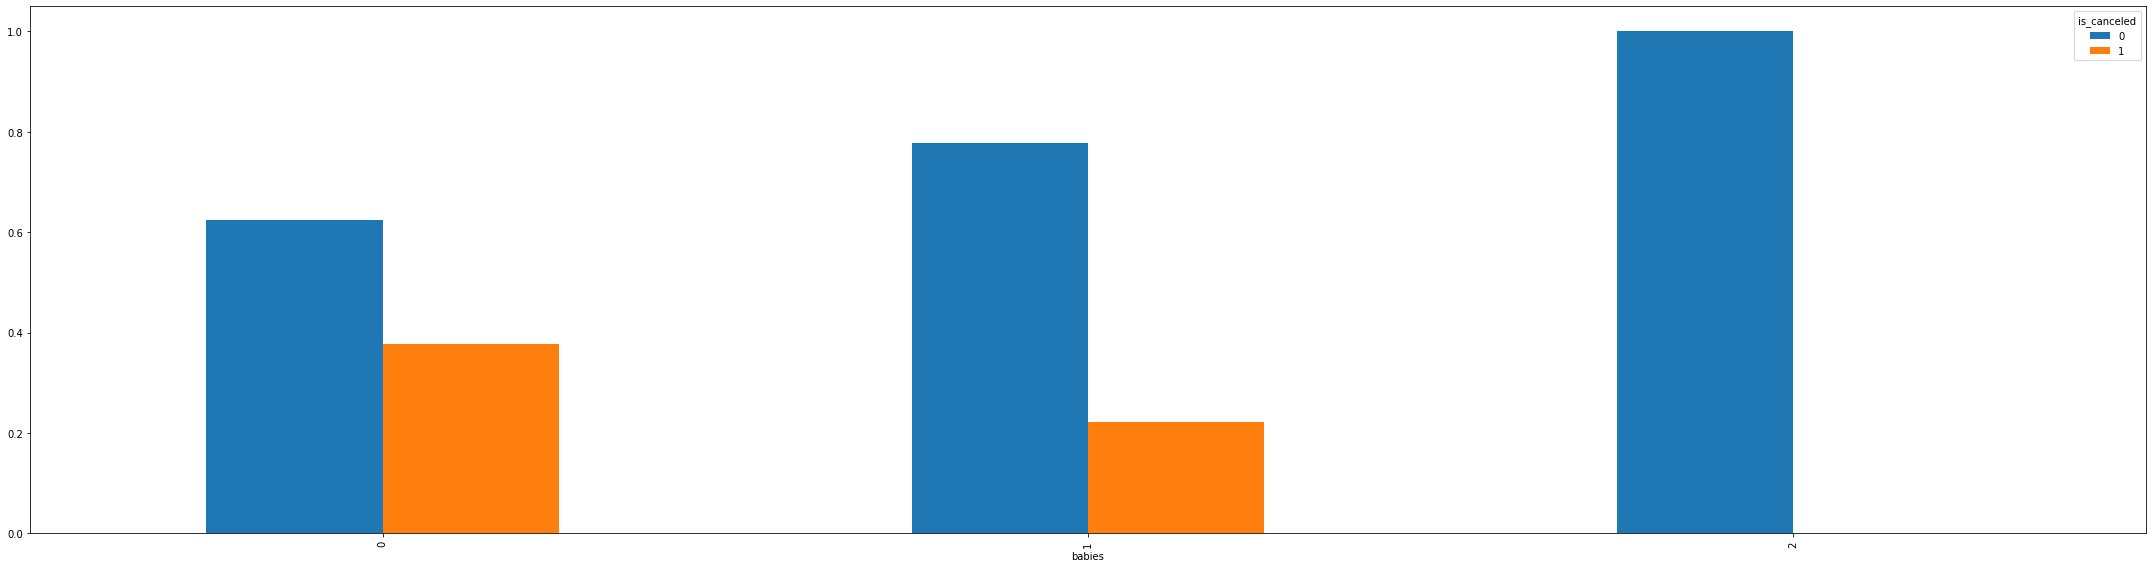

In [ ]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_babies.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

#### Comparación con is_canceled
Vamos a agrupar por el número de bebés para ver como han ido cambiando las cancelaciones en función de los mismos.

In [ ]:
data_babies_and_canceled = data[['babies', 'is_canceled']]
data_babies_and_canceled = data_babies_and_canceled.groupby(by=['babies']).sum()
data_babies_and_canceled

,is_canceled
babies,
0,3733
1,18
2,0


<Figure size 36000x720 with 0 Axes>

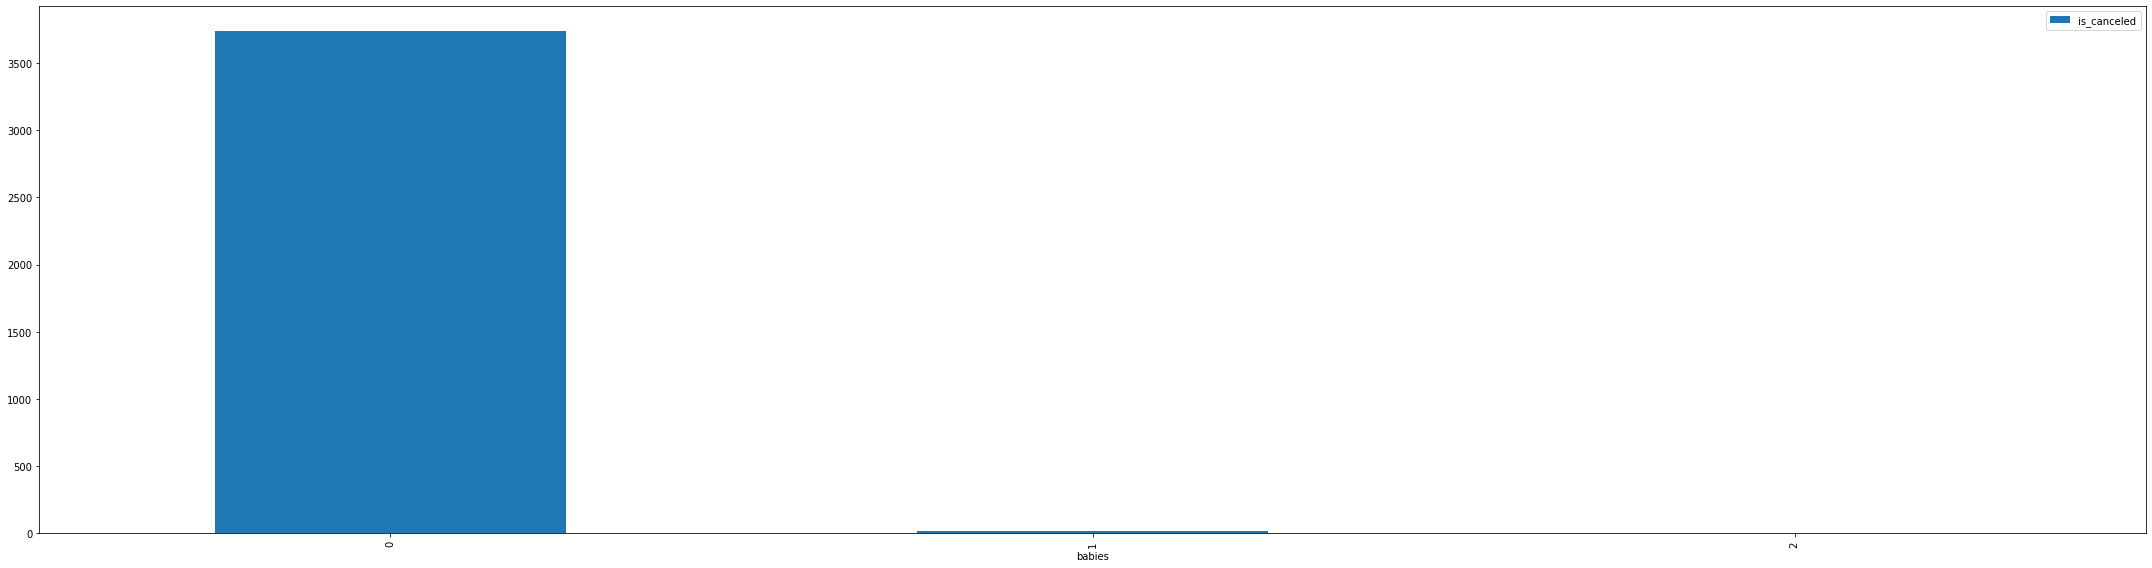

In [ ]:
plt.figure(figsize=(500,10));
data_babies_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()
# Pintar todos los valores del eje X!!!

### meal


In [ ]:
data.meal.describe()

count     10000
unique        5
top          BB
freq       7726
Name: meal, dtype: object

### country

### market_segment

### distribution_channel

### is_repeated_guest

### previous_cancellations

### previous_bookings_not_canceled

### reserved_room_type

### assigned_room_type

### booking_changes

### deposit_type

### agent
